# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [74]:

df_descr = pd.read_csv('otp_description.csv', sep='\t', encoding='utf8')

In [75]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [76]:
df_train = pd.read_csv('otp_train.csv', sep='\t', encoding='utf8')

In [77]:
df_train.shape

(15223, 52)

In [78]:
df_test = pd.read_csv('otp_test.csv', sep='\t', encoding='utf8')

In [79]:
df_test.shape

(14910, 52)

In [80]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [81]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [82]:
df = df_test.append(df_train).reset_index(drop=True)

In [83]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [85]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Два и более высших образования', 'Среднее специальное', 'Высшее', 'Неоконченное высшее', 'Среднее', 'Ученая степень', 'Неполное среднее'}


MARITAL_STATUS
{'Разведен(а)', 'Не состоял в браке', 'Состою в браке', 'Гражданский брак', 'Вдовец/Вдова'}


GEN_INDUSTRY
{nan, 'Здравоохранение', 'Транспорт', 'Торговля', 'Сельское хозяйство', 'Энергетика', 'Логистика', 'Туризм', 'Ресторанный бизнес/Общественное питание', 'Управляющая компания', 'Наука', 'Строительство', 'Страхование', 'Химия/Парфюмерия/Фармацевтика', 'Маркетинг', 'Информационные услуги', 'СМИ/Реклама/PR-агенства', 'Металлургия/Промышленность/Машиностроение', 'Коммунальное хоз-во/Дорожные службы', 'Развлечения/Искусство', 'Подбор персонала', 'Образование', 'Государственная служба', 'Информационные технологии', 'Юридические услуги/нотариальные услуги', 'Другие сферы', 'ЧОП/Детективная д-ть', 'Недвижимость', 'Салоны красоты и здоровья', 'Сборочные производства', 'Нефтегазовая промышленность', 'Банк/Финансы'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [86]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [87]:
df.info() 
# GEN_INDUSTRY отрасль работы клиента 27420
# GEN_TITLE должность  27420
# ORG_TP_STATE форма собственности компании  27420
# ORG_TP_FCAPITAL отношение к иностранному капиталу 27425 - почему на 5 больше? 
# JOB_DIR направление деятельности в нутри компании 27420
# WORK_TIME (время работы на текущем месте (в месяцах))  27416 Возможно, 4 только что устроились, не написали длительность
# Эти категории относятся к месту работы клиента, примерно одинаковое количество заполнено. 
# Скорее всего, это данные одних и тех же клиентов, можем WORK_TIME заполнить как 0. Как вариант - ввести столбец, где укажем, 
# работает человек или нет.


# TP_PROVINCE область торговой точки, где клиент брал последний кредит  29543
# # REGION_NM регион РФ  30131 2 человека не указали, скорее всего, не повлияет
# позже посмотреть - хорошо бы вывести данные и посмотреть глазами

# PREVIOUS_CARD_NUM_UTILIZED- количество уже утилизированных карт ( если пусто - 0) здесь пропуски данных заполняем нулями
#




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [88]:
# можно применить one-hot кодирование для этих признаков. Может получиться большое количество столбцов
# в случае регионов можно объединить в федеральные округа. Если посмотреть данные глазами, то регионы проживания довольно хорошо
# увязываются с названиями офисов, где был выдан кредит. 
# можно сократить категории образования до неполного среднего, среднего и высшего
# можно сократить категории семейного положения - в браке (включая гражданский) - не в браке
# для других категорий тоже можно сократить. Например - работа по найму или ИП
# GEN_TITLE - сократить (руководитель, работник, специалист, военный, ИП)
# JOB_DIR - не учитывать
# GEN_INDUSTRY не учитывать
#ORG_TP_FCAPITAL не учитывать
# POSTAL_ADDRESS_PROVINCE - убрать, неинформативно
# REG_ADDRESS_PROVINCE попробовать убрать. интересует, где он живет и совпадает ли это с адресом регистрации

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [89]:
import copy #кстати, я не умею программировать. хорошо бы хоть какую-то практику или рассказать, как самостоятельно учиться

In [90]:
def preproc_data(df_input):
    df_output = df_input.copy()
    df_output = df_output.drop(['AGREEMENT_RK'], axis=1)
    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')         
    df_output['PREVIOUS_CARD_NUM_UTILIZED']= df_output['PREVIOUS_CARD_NUM_UTILIZED'].replace(np.nan, 0)
    df_output['WORK_TIME']= df_output['WORK_TIME'].replace(np.nan, 0)
    df_output['GEN_INDUSTRY']= df_output['GEN_INDUSTRY'].replace(np.nan, 'Не указано')
    df_output['GEN_TITLE']= df_output['GEN_TITLE'].replace(np.nan, 'Не указано')
    df_output['ORG_TP_STATE']= df_output['ORG_TP_STATE'].replace(np.nan, 'Не указано')
    df_output['ORG_TP_FCAPITAL']= df_output['ORG_TP_FCAPITAL'].replace(np.nan, 'Не указано')
    df_output['JOB_DIR']= df_output['JOB_DIR'].replace(np.nan, 'Не указано')
    df_output['TP_PROVINCE']= df_output['TP_PROVINCE'].replace(np.nan, 'Не указано')
    df_output['REGION_NM']= df_output['REGION_NM'].replace(np.nan, 'Не указано')
    ## Your Code Here
    # простите, но все остальное я сделаю позже. К сожалению, у меня не очень много времени на выполнение задания. 
    # И мне очень тяжело погружатсья в тему без умения программировать
    # пока просто все уберу
    df_output = df_output.drop(['EDUCATION'], axis=1)
    df_output = df_output.drop(['MARITAL_STATUS'], axis=1)
    df_output = df_output.drop(['GEN_INDUSTRY'], axis=1)
    df_output = df_output.drop(['GEN_TITLE'], axis=1)
    df_output = df_output.drop(['ORG_TP_STATE'], axis=1)
    df_output = df_output.drop(['ORG_TP_FCAPITAL'], axis=1)
    df_output = df_output.drop(['JOB_DIR'], axis=1)
    df_output = df_output.drop(['FAMILY_INCOME'], axis=1)
    df_output = df_output.drop(['REG_ADDRESS_PROVINCE'], axis=1)
    df_output = df_output.drop(['FACT_ADDRESS_PROVINCE'], axis=1)
    df_output = df_output.drop(['POSTAL_ADDRESS_PROVINCE'], axis=1)
    df_output = df_output.drop(['TP_PROVINCE'], axis=1)
    df_output = df_output.drop(['REGION_NM'], axis=1)
   
    return df_output

In [91]:
preproc_data (df)

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,0,30,1,0,1,1,1,7000.0,0,1,...,1,2,2,8,0,0,0.000000,0.00,0.0,test
1,0,48,0,1,1,0,0,4100.0,1,1,...,0,2,1,15,0,0,0.000000,0.00,0.0,test
2,0,35,1,0,0,1,0,40000.0,1,1,...,1,1,1,1,0,0,0.000000,0.00,0.0,test
3,0,22,1,0,0,0,0,20000.0,1,1,...,1,3,2,9,0,0,0.000000,0.00,0.0,test
4,0,27,1,0,1,2,2,17000.0,1,1,...,1,1,1,5,0,0,0.000000,0.00,0.0,test
5,0,44,0,1,0,2,2,7000.0,1,1,...,0,1,1,5,0,0,0.000000,0.00,0.0,test
6,0,57,1,0,1,0,0,10000.0,1,1,...,1,3,3,14,0,0,0.000000,0.00,0.0,test
7,0,33,1,0,1,2,2,7500.0,1,1,...,1,1,1,5,0,0,0.000000,0.00,0.0,test
8,0,53,0,1,1,2,0,9000.0,1,1,...,0,1,1,4,0,0,0.000000,0.00,0.0,test
9,1,33,1,0,0,1,0,4000.0,1,1,...,1,1,1,6,0,0,0.000000,0.00,0.0,test


In [92]:
df_out = preproc_data(df)
df_out.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 39 columns):
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
PERSONAL_INCOME               30133 non-null float64
REG_FACT_FL                   30133 non-null int64
FACT_POST_FL                  30133 non-null int64
REG_POST_FL                   30133 non-null int64
REG_FACT_POST_FL              30133 non-null int64
REG_FACT_POST_TP_FL           30133 non-null int64
FL_PRESENCE_FL                30133 non-null int64
OWN_AUTO                      30133 non-null int64
AUTO_RUS_FL                   30133 non-null int64
HS_PRESENCE_FL                30133 non-null int64
COT_PRESENCE_FL       

In [93]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [94]:
df_y_train = df_train_preproc['TARGET']
df_X_train = df_train_preproc.drop(['TARGET'], axis = 1)


df_y_test = df_test_preproc['TARGET']
df_X_test = df_test_preproc.drop(['TARGET'], axis = 1)

df_train_preproc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15223 entries, 14910 to 30132
Data columns (total 38 columns):
TARGET                        15223 non-null int64
AGE                           15223 non-null int64
SOCSTATUS_WORK_FL             15223 non-null int64
SOCSTATUS_PENS_FL             15223 non-null int64
GENDER                        15223 non-null int64
CHILD_TOTAL                   15223 non-null int64
DEPENDANTS                    15223 non-null int64
PERSONAL_INCOME               15223 non-null float64
REG_FACT_FL                   15223 non-null int64
FACT_POST_FL                  15223 non-null int64
REG_POST_FL                   15223 non-null int64
REG_FACT_POST_FL              15223 non-null int64
REG_FACT_POST_TP_FL           15223 non-null int64
FL_PRESENCE_FL                15223 non-null int64
OWN_AUTO                      15223 non-null int64
AUTO_RUS_FL                   15223 non-null int64
HS_PRESENCE_FL                15223 non-null int64
COT_PRESENCE_FL   

#### Задание 5. Обучение и оценка качества разных моделей

In [95]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42
X_train, X_test, y_train, y_test = train_test_split (df_X_train, df_y_train, test_size=0.3, random_state=42)



                                                    ## Your Code Here


In [96]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here
model_DTC = DecisionTreeClassifier()
model_DTC.fit(X_train, y_train)                                 
predict_DTC = model_DTC.predict(X_test)                     
predict_proba_DTC = model_DTC.predict_proba(X_test)   

model_RFС = RandomForestClassifier()
model_RFС.fit(X_train, y_train)                              
predict_RFC = model_RFС.predict(X_test)                     
predict_proba_RFC = model_RFС.predict_proba(X_test)  

model_LR = LogisticRegression()                    
model_LR.fit(X_train, y_train)                                 
predict_LR = model_LR.predict(X_test)                    
predict_proba_LR = model_LR.predict_proba(X_test)  


In [97]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

print('precision for DTC', precision_score(y_test, predict_DTC))
print('recall for DTC', recall_score(y_test, predict_DTC))
print('accuracy for DTC', accuracy_score(y_test, predict_DTC))

print('precision for RFC', precision_score(y_test, predict_RFC))
print('recall for RFC', recall_score(y_test, predict_RFC))
print('accuracy for RFC', accuracy_score(y_test, predict_RFC))

print('precision for LR', precision_score(y_test, predict_LR))
print('recall for LR', recall_score(y_test, predict_LR))
print('accuracy for LR', accuracy_score(y_test, predict_LR))

## Your Code Here

precision for DTC 0.17447495961227788
recall for DTC 0.1945945945945946
accuracy for DTC 0.7902342894679221
precision for RFC 0.20689655172413793
recall for RFC 0.010810810810810811
accuracy for RFC 0.8747536676155026
precision for LR 0.3333333333333333
recall for LR 0.0036036036036036037
accuracy for LR 0.8780380994088023


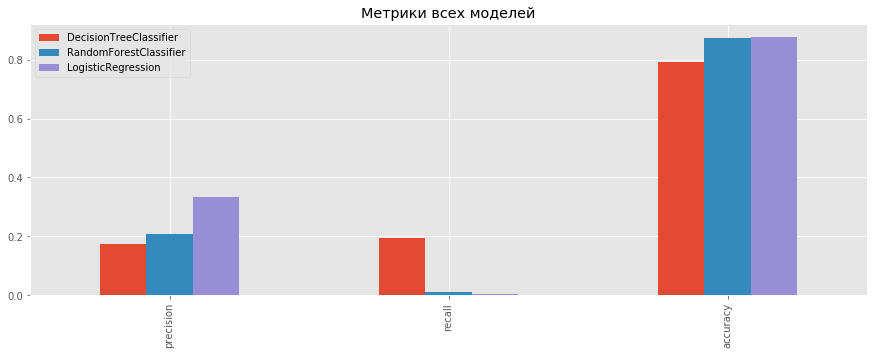

In [98]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here

from matplotlib import pyplot as plt

Metric_df = pd.DataFrame(data = {'DecisionTreeClassifier':[precision_score(y_test, predict_DTC), recall_score(y_test, predict_DTC), accuracy_score(y_test, predict_DTC)],
                                 'RandomForestClassifier':[precision_score(y_test, predict_RFC), recall_score(y_test, predict_RFC), accuracy_score(y_test, predict_RFC)],
                                 'LogisticRegression': [precision_score(y_test, predict_LR), recall_score(y_test, predict_LR), accuracy_score(y_test, predict_LR)]}, 
                         index=['precision', 'recall', 'accuracy'] )

Metric_df.plot(kind='bar',title = 'Метрики всех моделей', figsize=(15,5), legend=True)

LR 0.6361914257228316    DTC 0.5336133491417638    RFC 0.577929275237351


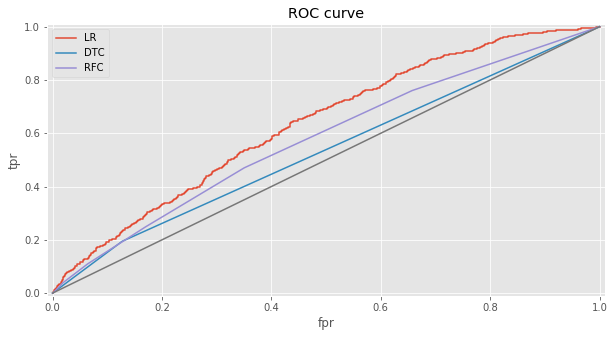

In [99]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here

from sklearn.metrics import roc_auc_score, roc_curve
roc_auc_score_LR = roc_auc_score(y_test, predict_proba_LR[:,1])
roc_auc_score_DTC = roc_auc_score(y_test, predict_proba_DTC[:,1])
roc_auc_score_RFC = roc_auc_score(y_test, predict_proba_RFC[:,1])
print('LR',roc_auc_score_LR, '   DTC', roc_auc_score_DTC, '   RFC', roc_auc_score_RFC)

%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, predict_proba_LR[:,1])
fpr_DTC, tpr_DTC, thresholds_DTC = roc_curve(y_test, predict_proba_DTC[:,1])
fpr_RFC, tpr_RFC, thresholds_RFC = roc_curve(y_test, predict_proba_RFC[:,1])
plt.figure(figsize=(10, 5))
plt.plot(fpr_LR, tpr_LR, label = 'LR')
plt.plot(fpr_DTC, tpr_DTC, label = 'DTC')
plt.plot(fpr_RFC, tpr_RFC, label = 'RFC')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()


In [100]:
roc_auc_score(y_test, predict_proba_LR[:,1])

0.6361914257228316

In [101]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

rfc = RandomForestClassifier()
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
cross_val_score_rfc = cross_val_score(
    dtc,
    X_test,
    y_test,
    scoring='roc_auc',
    cv=10
)
print('RandomForestClassifier кросс-валидация ', cross_val_score_rfc.mean())
cross_val_score_dtc = cross_val_score(
    rfc,
    X_test,
    y_test,
    scoring='roc_auc',
    cv=10
)
print('DecisionTreeClassifier кросс-валидация ', cross_val_score_dtc.mean())
cross_val_score_lr = cross_val_score(
    lr,
    X_test,
    y_test,
    scoring='roc_auc',
    cv=10
)
print('LogisticRegression кросс-валидация ', cross_val_score_lr.mean())

## Your Code Here

RandomForestClassifier кросс-валидация  0.5312639062839122
DecisionTreeClassifier кросс-валидация  0.595718664043677
LogisticRegression кросс-валидация  0.6435205538682853


In [102]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки


model_LR = LogisticRegression()                    
model_LR.fit(X_test, y_test)                                 
predict_LR = model_LR.predict(X_test)                    
predict_proba_LR = model_LR.predict_proba(X_test)  
 
#не поняла, видимо. попробую разобраться позже

0.6418079096045197


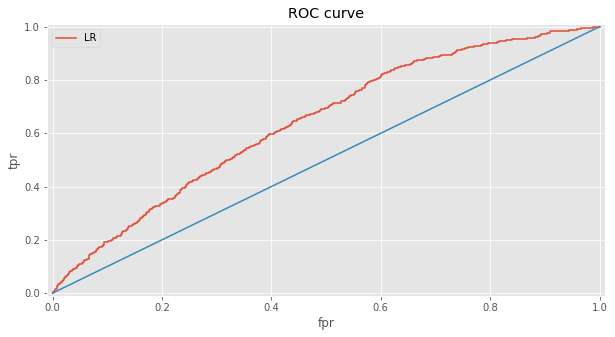

In [103]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

roc_auc_score_LR = roc_auc_score(y_test, predict_proba_LR[:,1])  # вроде уже делали? или я перепутала?
print(roc_auc_score_LR) 

fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, predict_proba_LR[:,1])

plt.figure(figsize=(10, 5))
plt.plot(fpr_LR, tpr_LR, label = 'LR')

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()

## Your Code Here

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [104]:
### И далее ;)